In [2]:
df = pd.read_csv('preprocessed_foodrecipes.csv')
df.head(1)

NameError: name 'pd' is not defined

In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('preprocessed_foodrecipes.csv')
df.head(1)

,link,title,ratings,num_reviews,ingredients,servings,cook_time,calorie,fat_g,carb_g,protein_g,cholesterol_mg,sodium_mg
0,https://www.allrecipes.com/recipe/100164/chip-...,Chip Truck Fries,4.44,44,"['6 baking potatoes, cut into 1/4 inch slices'...",4.0,60,369.0,14.0,56.3,6.5,0.0,478.0


In [13]:
df.shape

(4776, 13)

In [14]:
df = df[['title', 'ingredients']]
df.ingredients[0]

"['6 baking potatoes, cut into 1/4 inch slices', '1/4 cup vegetable oil', '2 teaspoons seasoned salt']"

In [15]:
import ast

def list_to_str(x):
    x = ast.literal_eval(x)
    x = ','.join(x)
    return x

In [16]:
df.ingredients = df.ingredients.apply(list_to_str)
df.ingredients[0]

'6 baking potatoes, cut into 1/4 inch slices,1/4 cup vegetable oil,2 teaspoons seasoned salt'

In [12]:
data = df.ingredients.values.tolist()
data = [re.sub(r'[^a-zA-Z]', ' ', sent.lower()) for sent in data] 
data[0]

NameError: name 're' is not defined

In [17]:
import re
data = df.ingredients.values.tolist()
data = [re.sub(r'[^a-zA-Z]', ' ', sent.lower()) for sent in data] 
data[0]

'  baking potatoes  cut into     inch slices     cup vegetable oil   teaspoons seasoned salt'

In [18]:
units = ['spoon','pound','cup','quart','ounce','pint','degree','dash','pinch','pack','halve','bunch','inch']
for unit in units:
    expre = re.compile('\w*' + unit + '\w*')
    data = [re.sub(expre, '', sent).strip() for sent in data]

data[0]

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-18-355e78664d3a>:3: DeprecationWarning: invalid escape sequence \w
  expre = re.compile('\w*' + unit + '\w*')
<ipython-input-18-355e78664d3a>:3: DeprecationWarning: invalid escape sequence \w
  expre = re.compile('\w*' + unit + '\w*')


'baking potatoes  cut into      slices      vegetable oil    seasoned salt'

In [19]:
data = [' '.join(sent.split()) for sent in data]

data[0]

'baking potatoes cut into slices vegetable oil seasoned salt'

In [20]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore, CoherenceModel

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(sentence))

data_words = list(sent_to_words(data))
data_words[0]

C:\Users\chamo\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\chamo\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['baking',
 'potatoes',
 'cut',
 'into',
 'slices',
 'vegetable',
 'oil',
 'seasoned',
 'salt']

In [13]:
pip install -U gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.14
    Uninstalling Cython-0.29.14:
      Successfully uninstalled Cython-0.29.14
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\chamo\\anaconda3\\lib\\site-packages\\~ensim\\corpora\\_mmreader.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [21]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore, CoherenceModel

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(sentence))

data_words = list(sent_to_words(data))
data_words[0]

['baking',
 'potatoes',
 'cut',
 'into',
 'slices',
 'vegetable',
 'oil',
 'seasoned',
 'salt']

In [22]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 

In [23]:
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [24]:
data_bigram = [bigram_mod[doc] for doc in data_words]
data_bigram[0]

['baking',
 'potatoes',
 'cut',
 'into',
 'slices',
 'vegetable',
 'oil',
 'seasoned',
 'salt']

In [25]:
data_bigram[1]

['irish',
 'bacon',
 'diced',
 'large',
 'potatoes',
 'peeled',
 'and',
 'cubed',
 'can',
 'diced',
 'tomatoes',
 'with',
 'juice',
 'chicken',
 'stock',
 'or',
 'as',
 'needed',
 'salt',
 'and',
 'black',
 'pepper',
 'to',
 'taste',
 'thinly',
 'sliced',
 'dark',
 'green',
 'savoy',
 'cabbage',
 'leaves']

In [19]:
stop_words = stopwords.words('english')

NameError: name 'stopwords' is not defined

In [26]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

C:\Users\chamo\anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\chamo\anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, defaultdict
C:\Users\chamo\anaconda3\lib\site-packages\nltk\lm\vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Counter, Iterable
C:\Users\chamo\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `i

In [27]:
data_nonstop = [[word for word in doc if word not in stop_words] for doc in data_bigram]
data_nonstop[0]

['baking', 'potatoes', 'cut', 'slices', 'vegetable', 'oil', 'seasoned', 'salt']

In [28]:
data_nonstop[1]

['irish',
 'bacon',
 'diced',
 'large',
 'potatoes',
 'peeled',
 'cubed',
 'diced',
 'tomatoes',
 'juice',
 'chicken',
 'stock',
 'needed',
 'salt',
 'black',
 'pepper',
 'taste',
 'thinly',
 'sliced',
 'dark',
 'green',
 'savoy',
 'cabbage',
 'leaves']

In [29]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatization(texts, allowed_postages=['NOUN','ADJ']):
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postages])
    return texts_out

In [24]:
import spacy

ModuleNotFoundError: No module named 'spacy'

In [25]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [30]:
import spacy

In [27]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [28]:
python -m spacy download en

SyntaxError: invalid syntax (<ipython-input-28-fc4d5d118d23>, line 1)

In [29]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [30]:
data_lemmatized = lemmatization(data_nonstop, allowed_postags=['NOUN','ADJ'])
data_lemmatized[0]

TypeError: lemmatization() got an unexpected keyword argument 'allowed_postags'

In [31]:
import spacy

In [32]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [33]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz --no-deps

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019125 sha256=222e80191b91d281df03fcaee5051594f559621febe78e776bc28168ef8d5c3e
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\64\69\41\6f820cf1d7488a0381a2059f66ec9f8f23116f7c67d18f3d8d
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [5]:
nlp = spacy.load('en', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [6]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [7]:
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (<ipython-input-7-e8a31c0c54ec>, line 1)

In [35]:
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
C:\Users\chamo\anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\chamo\anaconda3\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


In [32]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [33]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatization(texts, allowed_postages=['NOUN','ADJ']):
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postages])
    return texts_out

In [34]:
data_lemmatized = lemmatization(data_nonstop, allowed_postages=['NOUN','ADJ'])
data_lemmatized[0]

['potato', 'slice', 'vegetable', 'oil', 'salt']

In [35]:
data_lemmatized[1]

['large',
 'potato',
 'tomato',
 'juice',
 'chicken',
 'stock',
 'salt',
 'black',
 'pepper',
 'taste',
 'dark',
 'green',
 'savoy',
 'cabbage',
 'leave']

In [36]:
data_lemmatized[0]

['potato', 'slice', 'vegetable', 'oil', 'salt']

In [37]:
data_lemmatized[2]

['pink',
 'salmon',
 'green',
 'onion',
 'celery',
 'mayonnaise',
 'lemon',
 'juice',
 'dill',
 'salt']

In [38]:
#to check word frequencies
vocab = dict()
for doc in data_lemmatized:
    for word in doc:
        if word not in vocab.keys():
            vocab[word] = 1
        else:
            vocab[word] +=1

In [39]:
len(vocab)

1206

In [40]:
recipe_stopwords = ['slice','large','diced','stock','taste','leave','powder','sliced','fresh','low','fat',
                    'whole','purpose','mix','ripe','medium','raw','coarse','style','active','dry','ground',
                    'white','heart','piece','crushed','cut','minute','pocket','shredded','optional','cube',
                    'hour','bag','baby','seeded','small','clove','country','leaf','dressing','center','fillet',
                    'sea','chunk','light','food','head','container','link','frozen','can','cooked','stalk',
                    'regular','dusting','heavy','round','rinsed','thawed','jar','solid','creamy','z','fluid',
                    'uncooked','sheet','strip','short','soft','mixed','blue','flake','warm','unbleached','sun',
                    'old','topping','wedge','thick','lean','extra','meal','preserve','mild','half','crosswise',
                    'new','seasoning','kidney','black','green','red','yellow','white','unpeeled','boiling',
                    'amount','cold','snow','cluster','necessary','firm','soda','cubed','temperature','deep',
                    'flat','iron','seedless','boneless','strong','bottle','unsweetended','smoked','melted',
                    'thin','hard','pure','bulk','unsalted','deveined','petite','cooking','box','prepared',
                    'softened','split','kosher','blanched_slivered','carton','canned','flavor','broken','free',
                    'blend','lengthwise','real','purple','dice','flaked','bite_sized','refrigerated_crescent',
                    'reserved','undrained','original','stuffing','bulb','sharp','reduced_fat','color',
                    'pressed','diagonal','good','season','bit','jumbo','instant','skim','chopped','paper',
                    'towel','roasted','flaky','ear','flavoring','fine','minced', 'square','size','single',
                    'refrigerated','skinless','pitted','bay','seasoned','divided','long','crumbled','filling',
                    'miniature','mashed','peeled','top','bottom','flat_leaf','rubbed','liquid','ready','chop',
                    'non','frying','condensed','stewed','light','food','container','link','can','optional',
                    'diced','fluid','meal','preserve','seasoning','bottle','box','split','flavor','lengthwise',
                    'flavoring','square','size','at_room','grade','shape','cuisine']

In [41]:
data_clean = [[word for word in doc if word not in recipe_stopwords] for doc in data_lemmatized]

In [42]:
data_clean[0]

['potato', 'vegetable', 'oil', 'salt']

In [43]:
data_clean[1]

['potato',
 'tomato',
 'juice',
 'chicken',
 'salt',
 'pepper',
 'dark',
 'savoy',
 'cabbage']

In [44]:
#checking the word frequencies
vocab_clean = dict()
for doc in data_clean:
    for word in doc:
        if word not in vocab_clean.keys():
            vocab_clean[word] = 1
        else:
            vocab_clean[word] +=1

In [45]:
len(vocab_clean)

1017

In [46]:
#creating a df including word counts
df_count = pd.DataFrame(vocab_clean, index=['count']).transpose().sort_values('count', ascending=False)
df_count = df_count.reset_index().rename(columns={'index':'ingredient'})
df_count.head()

,ingredient,count
0,pepper,4394
1,salt,2820
2,onion,2773
3,oil,2151
4,cheese,1674


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
def plot_ingredient(df, top_n=10, figsize=(8,10)):
    plt.figure(figsize=figsize)
    
    count = df['count'].iloc[:top_n]
    ingred = df['ingredient'].iloc[:top_n]
    sns.barplot(x=count, y= ingred, palette='Reds_r')
    plt.title(f'{top_n} frequent ingredients\n)
    plt.xlabel('Count')
    plt.ylabel('Ingredient')
    plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-52-7ec712878491>, line 7)

In [48]:
def plot_ingredient(df, top_n=10, figsize=(8,10)):
    plt.figure(figsize=figsize)
    
    count = df['count'].iloc[:top_n]
    ingred = df['ingredient'].iloc[:top_n]
    sns.barplot(x=count, y= ingred, palette='Reds_r')
    plt.title(f'{top_n} frequent ingredients\n')
    plt.xlabel('Count')
    plt.ylabel('Ingredient')
    plt.show()

C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\sea

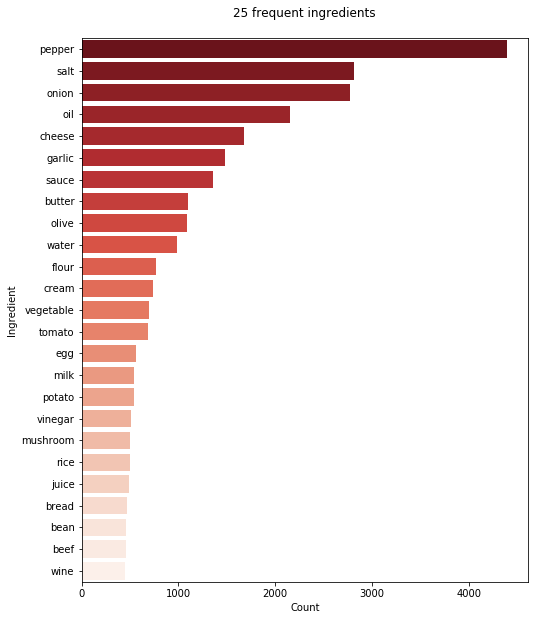

In [49]:
plot_ingredient(df_count, top_n=25)

C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\sea

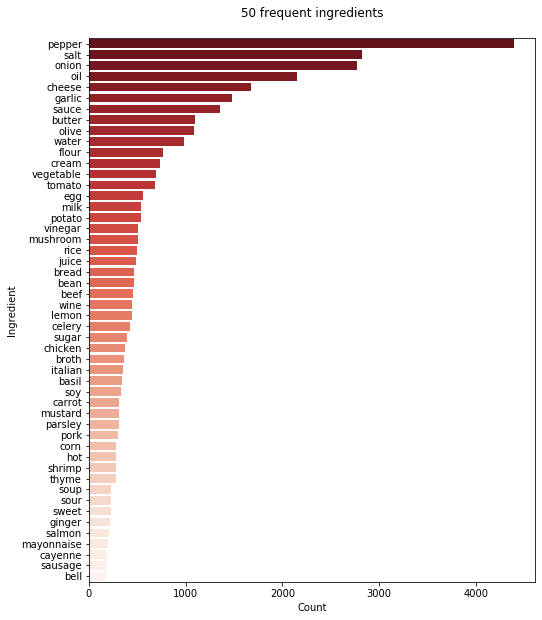

In [50]:
plot_ingredient(df_count, top_n=50)

In [51]:
recipe_stopwords = ['slice','large','diced','stock','taste','leave','powder','sliced','fresh','low','fat',
                    'whole','purpose','mix','ripe','medium','raw','coarse','style','active','dry','ground',
                    'white','heart','piece','crushed','cut','minute','pocket','shredded','optional','cube',
                    'hour','bag','baby','seeded','small','clove','country','leaf','dressing','center','fillet',
                    'sea','chunk','light','food','head','container','link','frozen','can','cooked','stalk',
                    'regular','dusting','heavy','round','rinsed','thawed','jar','solid','creamy','z','fluid',
                    'uncooked','sheet','strip','short','soft','mixed','blue','flake','warm','unbleached','sun',
                    'old','topping','wedge','thick','lean','extra','meal','preserve','mild','half','crosswise',
                    'new','seasoning','kidney','black','green','red','yellow','white','unpeeled','boiling',
                    'amount','cold','snow','cluster','necessary','firm','soda','cubed','temperature','deep',
                    'flat','iron','seedless','boneless','strong','bottle','unsweetended','smoked','melted',
                    'thin','hard','pure','bulk','unsalted','deveined','petite','cooking','box','prepared',
                    'softened','split','kosher','blanched_slivered','carton','canned','flavor','broken','free',
                    'blend','lengthwise','real','purple','dice','flaked','bite_sized','refrigerated_crescent',
                    'reserved','undrained','original','stuffing','bulb','sharp','reduced_fat','color',
                    'pressed','diagonal','good','season','bit','jumbo','instant','skim','chopped','paper',
                    'towel','roasted','flaky','ear','flavoring','fine','minced', 'square','size','single',
                    'refrigerated','skinless','pitted','bay','seasoned','divided','long','crumbled','filling',
                    'miniature','mashed','peeled','top','bottom','flat_leaf','rubbed','liquid','ready','chop',
                    'non','frying','condensed','stewed','light','food','container','link','can','optional',
                    'diced','fluid','meal','preserve','seasoning','bottle','box','split','flavor','lengthwise',
                    'flavoring','square','size','at_room','grade','shape','cuisine','hot','sour']

In [52]:
data_clean = [[word for word in doc if word not in recipe_stopwords] for doc in data_lemmatized]

C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\sea

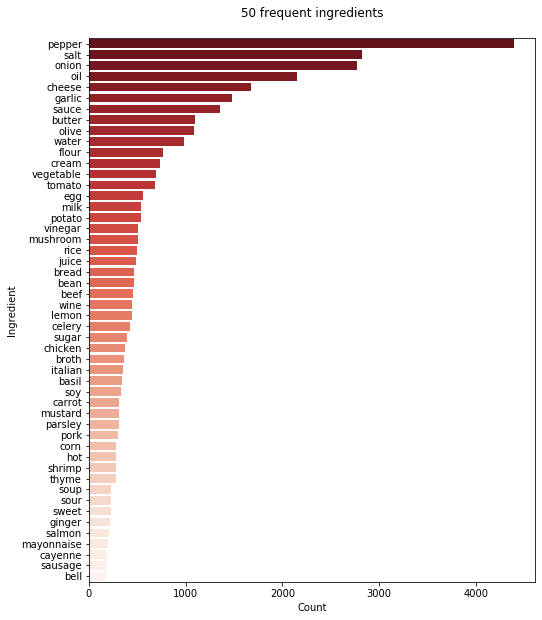

In [53]:
plot_ingredient(df_count, top_n=50)

C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\sea

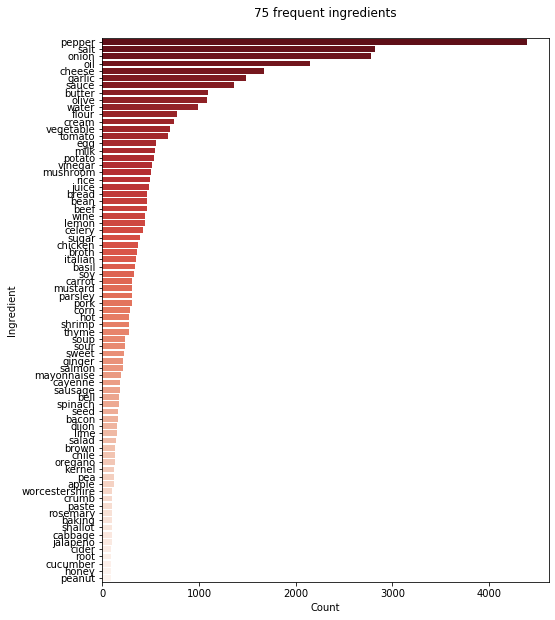

In [54]:
plot_ingredient(df_count, top_n=75)

# Topic Modeling
 /# unique words/ ingredients = 1015  
    Goal: Provide label(s) to each recipe to build the content based recommender system. 
    The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. 
    

In [55]:
#Create dictionary
id2word = corpora.Dictionary(data_clean)

In [56]:
import gensim
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_clean)


In [57]:
# Create Dictionary
id2word = corpora.Dictionary(data_clean)

In [58]:
#Create corpus
texts = data_clean

In [64]:
#Term Document Frequency
corpus = [id2word.doc2bow(text) for texts]

SyntaxError: invalid syntax (<ipython-input-64-059a371c83af>, line 2)

In [59]:
#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [60]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1)]

In [61]:
corpus[1]

[(1, 1), (2, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]

In [62]:
#The produced corpus shown above is a mapping of (word_id, word_frequency)

In [63]:
#This shows what word a given id is corresponds to
id2word[0]

'oil'

In [64]:
id2word[1]

'potato'

In [65]:
#human readable format of corpus (term frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('oil', 1), ('potato', 1), ('salt', 1), ('vegetable', 1)]]

Building the topic model

*chunksize* is the number of documents to be used in each training chunk. 
*update_every* determines how often the model parameters should be updated.   
*passes* is the total number of training passes.

In [66]:
lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         num_topics=10, 
                         random_state=100,
                         chunksize=100, 
                         passes=10, 
                         per_word_topics=True)

In [67]:
# Print keywords in the 10 topics
pprint(lda_model.print_topics())

NameError: name 'pprint' is not defined

In [68]:
from pprint import pprint

In [69]:
# Print keywords in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.147*"pepper" + 0.083*"salt" + 0.083*"lemon" + 0.082*"juice" + '
  '0.060*"onion" + 0.050*"butter" + 0.049*"chicken" + 0.034*"broth" + '
  '0.031*"garlic" + 0.021*"salmon"'),
 (1,
  '0.138*"cream" + 0.130*"cheese" + 0.088*"mushroom" + 0.072*"onion" + '
  '0.069*"butter" + 0.052*"soup" + 0.045*"bread" + 0.036*"salt" + '
  '0.032*"flour" + 0.027*"milk"'),
 (2,
  '0.115*"sauce" + 0.084*"rice" + 0.084*"oil" + 0.064*"soy" + '
  '0.054*"vegetable" + 0.054*"onion" + 0.049*"water" + 0.042*"ginger" + '
  '0.036*"pepper" + 0.029*"garlic"'),
 (3,
  '0.147*"pepper" + 0.088*"onion" + 0.063*"bean" + 0.062*"tomato" + '
  '0.057*"oil" + 0.057*"garlic" + 0.048*"salt" + 0.035*"olive" + 0.025*"sauce" '
  '+ 0.020*"italian"'),
 (4,
  '0.088*"salt" + 0.070*"flour" + 0.055*"water" + 0.052*"vegetable" + '
  '0.051*"oil" + 0.050*"butter" + 0.049*"sugar" + 0.043*"onion" + 0.036*"milk" '
  '+ 0.036*"pepper"'),
 (5,
  '0.134*"beef" + 0.121*"pepper" + 0.092*"sauce" + 0.077*"onion" + '
  '0.077*"salt" + 0

Model perplexity and topic coherence can be used to judge how good a given topic model is

In [70]:
#compute perplexity (when perpl. is lower -> the better model)
perplexity = lda_model.log_perplexity(corpus)
print('Perplexity: ', np.round(perplexity, 2))

Perplexity:  -4.76


In [71]:
#compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, 
                                     dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', np.round(coherence_lda, 3))

Coherence Score:  0.383


In [72]:
import tqdm

In [2]:
import pyLDAvis
import pyLDAvis.gensim

ModuleNotFoundError: No module named 'pyLDAvis'

In [3]:
conda install -c memex pyldavis

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - pyldavis

Current channels:

  - https://conda.anaconda.org/memex/win-64
  - https://conda.anaconda.org/memex/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
import pyLDAvis
import pyLDAvis.gensim

ModuleNotFoundError: No module named 'pyLDAvis'

In [5]:
pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136870 sha256=5df97f7d2b99fef637e15cb4244b3e0bb899aa77ca89b327ea97bc3875005acc
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\c9\21\f6\17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=6659c42564690da92064afe88ac130c091e7aeefefa8835d548a87cfb341bd42
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully

In [7]:
import pyLDAvis
import pyLDAvis.gensim

C:\Users\chamo\anaconda3\lib\site-packages\scipy\fft\__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
C:\Users\chamo\anaconda3\lib\site-packages\scipy\special\orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
C:\Users\chamo\anaconda3\lib\site-packages\scipy\special\orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias

ModuleNotFoundError: No module named 'pyLDAvis.gensim'

In [73]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [74]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.105727  0.041640       1        1  15.862475
9      0.174374  0.002818       2        1  13.652486
0      0.142545  0.061423       3        1  11.349479
8     -0.089680  0.065322       4        1  10.339312
2      0.136860 -0.210487       5        1  10.148309
4     -0.018224 -0.132685       6        1  10.136807
1     -0.152657  0.181511       7        1   9.828163
6     -0.003209  0.123388       8        1   8.631960
5      0.088026 -0.009138       9        1   6.699357
7     -0.383762 -0.123793      10        1   3.351654, topic_info=       Term         Freq        Total Category  logprob  loglift
33   cheese  1602.000000  1602.000000  Default  30.0000  30.0000
72    cream   696.000000   696.000000  Default  29.0000  29.0000
21    sauce  1309.000000  1309.000000  Default  28.0000  28.0000
37    olive  1073.000000  1073.000000  Default  27.0000  27.0000
69     beef   459.000000   459.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
52    sugar    26.999494   398.415975  Topic10  -4.0318   0.7040
44    water    19.382418   988.342613  Topic10  -4.3632  -0.5359
102    seed    12.960555   162.157990  Topic10  -4.7657   0.8691
69     beef    15.500192   459.884807  Topic10  -4.5867   0.0056
10   tomato    13.641676   669.045751  Topic10  -4.7145  -0.4970

[592 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
567       2  0.850378  allspice
567       3  0.085038  allspice
45        6  0.925367    almond
143       8  0.960296  american
820      10  0.645382     amino
...     ...       ...       ...
698       4  0.847470      yolk
329       2  0.060251      zest
329       3  0.903767      zest
41        1  0.870742  zucchini
41        8  0.116965  zucchini

[839 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 1, 9, 3, 5, 2, 7, 6, 8])

In [75]:
#tuning hyperparameters
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary,
                             num_topics=k, 
                             random_state=100,
                             chunksize=100,
                             passes=10,
                             alpha=a,
                             eta=b,
                             per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=texts, 
                                         dictionary=dictionary, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [76]:
#assigning a topic range
topics_range = range(2,16,1)

In [77]:
#alpha
alpha = [0.01, 0.1, 1, 'symmetric', 'asymmetric']

In [78]:
# beta
beta = [0.01, 0.1, 1, 'symmetric']

In [79]:
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []}

In [80]:
if 1 == 1:
    pbar = tqdm.tqdm(total=350)
    
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha 
        for a in alpha:
            # iterare through beta
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus, 
                                              dictionary=id2word, 
                                              k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                    
                pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 280/350 [2:35:42<38:55, 33.37s/it]


In [81]:
df_result = pd.read_csv('lda_tuning_results.csv')
df_result.head()

,Topics,Alpha,Beta,Coherence
0,2,0.01,0.01,0.339302
1,2,0.01,0.1,0.343213
2,2,0.01,1,0.322465
3,2,0.01,symmetric,0.329778
4,2,0.1,0.01,0.343213


C:\Users\chamo\anaconda3\lib\site-packages\seaborn\relational.py:730: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  null_ci = pd.Series(index=["low", "high"], dtype=np.float)


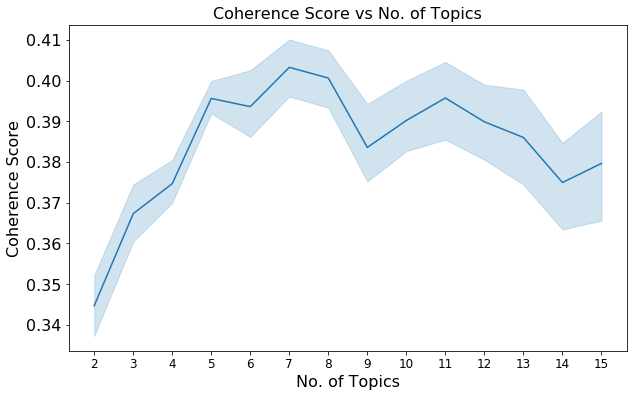

In [86]:
#printing a graph to visualise coherence score vs topics distributed
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_result, x='Topics', y='Coherence')
plt.xticks(range(2, 16, 1), range(2, 16, 1), fontsize='12')
plt.yticks(fontsize='16')
plt.xlabel('No. of Topics', fontsize='16')
plt.ylabel('Coherence Score', fontsize='16')
plt.title('Coherence Score vs No. of Topics', fontsize='16');

In [87]:
mallet_path = 'D:/Academics/Level4 Semester2/fyp/programs/mallet-2.0.8/bin/mallet'

In [88]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

AttributeError: module 'gensim.models' has no attribute 'wrappers'

In [89]:
from gensim.models.wrappers import wrappers

ModuleNotFoundError: No module named 'gensim.models.wrappers'

In [90]:
pip install wrappers

  Created wheel for wrappers: filename=wrappers-0.1.9-py3-none-any.whl size=3596 sha256=2a11e3c6918d44e8518807f9e5f8d2f9c558ef3c92986e9711728fd0b3aeaf84
  Stored in directory: c:\users\chamo\appdata\local\pip\cache\wheels\3b\a0\6d\c9ffb01d3744740a49d8e34ae73d7b8854df726f737024ff5c
Successfully built wrappers
Note: you may need to restart the kernel to use updated packages.


In [95]:
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora

#### Finding the optimal number of topics for a LDA-Model

To build an LDA model, we would require to find the optimal number of topics to be extracted from the caption dataset. We can use the coherence score of the LDA model to identify the optimal number of topics.

We can iterate through the list of several topics and build the LDA model for each number of topics using Gensim's LDAMulticore class. Then load the model object to the CoherenceModel class to obtain the coherence score. The LDA model and its corresponding Coherence score can be saved to find the optimal number of topics later in the course. Finally, we can plot the results of all topics and their coherence scores for better understanding.

Once we obtain the optimal model, we can print the topics summary with the top 10 words that contribute most to each topic.

Now we check the perplexity and the coherence score of the optimal model. An ideal LDA model should have low perplexity and high coherence scores.

In [105]:
# Find the optimal number of topics 
# looking for the best alpha and beta based on coherence value score
df_result[df_result.Topics == 8].sort_values('Coherence', ascending=False)[:5]

,Topics,Alpha,Beta,Coherence
138,8,asymmetric,1,0.430212
123,8,0.01,symmetric,0.420679
122,8,0.01,1,0.418583
134,8,symmetric,1,0.414180
120,8,0.01,0.01,0.413959


According to the above result, with 8 number of topics, alpha of 0.01 and beta of 1, the coherence score value is 0.418583 which is a 9.138% improvement in coherence score over the baseline. (C_v over the baseline = 0.383)

#### Building the model

In [107]:
lda_model_final = LdaMulticore(corpus=corpus,
                               id2word=id2word,
                               num_topics=8, 
                               random_state=100,
                               chunksize=100,
                               passes=10,
                               alpha=0.01,
                               eta=1)

In [109]:
# visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model_final, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.137277 -0.063081       1        1  20.455187
6     -0.097462  0.027597       2        1  18.983997
4     -0.099006  0.070980       3        1  18.860930
0     -0.054376 -0.011927       4        1  12.621658
2     -0.007790 -0.095796       5        1  11.876299
7      0.071090  0.203049       6        1  10.035661
5      0.064315 -0.098413       7        1   6.666905
1      0.260506 -0.032408       8        1   0.499362, topic_info=            Term         Freq        Total Category  logprob  loglift
21         sauce  1164.000000  1164.000000  Default  30.0000  30.0000
35         flour   649.000000   649.000000  Default  29.0000  29.0000
33        cheese  1491.000000  1491.000000  Default  28.0000  28.0000
13         lemon   385.000000   385.000000  Default  27.0000  27.0000
51          milk   466.000000   466.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
563      scallop     0.491675    23.456138   Topic8  -6.1337   1.4345
120       banana     0.463618    25.524776   Topic8  -6.1924   1.2912
115        apple     0.476774    98.905831   Topic8  -6.1644  -0.0353
12          dill     0.467812    72.718455   Topic8  -6.1834   0.2533
225  unsweetened     0.458703    21.008731   Topic8  -6.2031   1.4753

[431 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
168       1  0.438634     adobo
168       2  0.031331     adobo
168       3  0.031331     adobo
168       4  0.031331     adobo
168       5  0.031331     adobo
...     ...       ...       ...
41        3  0.012885  zucchini
41        4  0.012885  zucchini
41        5  0.038654  zucchini
41        6  0.012885  zucchini
41        7  0.012885  zucchini

[1997 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 5, 1, 3, 8, 6, 2])

In [110]:
pyLDAvis.save_html(LDAvis_prepared, 'recipe_lda.html')

In [111]:
# print keywords in the 8 topics
pprint(lda_model_final.print_topics())
doc_lda = lda_model_final[corpus]

[(0,
  '0.098*"pepper" + 0.067*"salt" + 0.066*"lemon" + 0.054*"juice" + '
  '0.044*"onion" + 0.038*"oil" + 0.031*"salmon" + 0.030*"olive" + '
  '0.028*"garlic" + 0.026*"mustard"'),
 (1,
  '0.007*"pineapple" + 0.006*"organic" + 0.006*"cherry" + 0.006*"strawberry" + '
  '0.005*"veggie" + 0.005*"margarine" + 0.005*"spectrum_natural" + '
  '0.004*"tender" + 0.004*"orange" + 0.004*"cereal"'),
 (2,
  '0.076*"oil" + 0.069*"sauce" + 0.047*"soy" + 0.043*"vegetable" + '
  '0.043*"rice" + 0.041*"onion" + 0.039*"water" + 0.039*"pepper" + '
  '0.033*"ginger" + 0.026*"salt"'),
 (3,
  '0.139*"pepper" + 0.078*"onion" + 0.051*"salt" + 0.050*"oil" + '
  '0.046*"tomato" + 0.044*"bean" + 0.043*"garlic" + 0.030*"olive" + '
  '0.024*"sauce" + 0.023*"corn"'),
 (4,
  '0.083*"onion" + 0.082*"pepper" + 0.065*"salt" + 0.048*"cream" + '
  '0.044*"butter" + 0.038*"potato" + 0.037*"mushroom" + 0.030*"water" + '
  '0.027*"chicken" + 0.025*"soup"'),
 (5,
  '0.090*"sauce" + 0.083*"pepper" + 0.061*"pork" + 0.040*"salt"

In [112]:
doc_lda[0]

[(4, 0.98284304)]

In [113]:
# create a df to show lda matrix
lda_dict = {0: [], 1: [], 2: [], 3: [], 4: [], 5:[], 6:[], 7:[]}

for _ in range(len(doc_lda)):
    for key in list(lda_dict.keys()):
        lda_dict[key].append(0)

# create a df filled with 0
lda_matrix = pd.DataFrame(lda_dict)

# fill the probability distribution of topics for each row
for i, row in enumerate(doc_lda):
    for j, (topic, prop_topic) in enumerate(row):
        lda_matrix.loc[i, topic] = prop_topic

In [114]:
lda_matrix.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.0,0.0,0.00000,0.982843,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.99229,0.000000,0.000000,0.0,0.0
2,0.992290,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.00000,0.000000,0.990113,0.0,0.0
4,0.993055,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0


In [115]:
# add recipe name
lda_matrix = lda_matrix.merge(df, left_index=True, right_index=True, how='inner')
lda_matrix.head()

,0,1,2,3,4,5,6,7,title,ingredients
0,0.000000,0.0,0.0,0.00000,0.982843,0.000000,0.0,0.0,Chip Truck Fries,"6 baking potatoes, cut into 1/4 inch slices,1/..."
1,0.000000,0.0,0.0,0.99229,0.000000,0.000000,0.0,0.0,Irish Bacon And Cabbage Soup,"1/2 pound Irish bacon, diced,2 large potatoes,..."
2,0.992290,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,Quick Salmon Salad,"2 (6 ounce) cans pink salmon, drained,1/2 cup ..."
3,0.000000,0.0,0.0,0.00000,0.000000,0.990113,0.0,0.0,Bills Seasoned Ketchup,"1 (28 ounce) bottle ketchup,2 teaspoons hot pe..."
4,0.993055,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,Celery Salad,"3/4 cup sliced celery,1/3 cup dried sweet cher..."


In [116]:
# assign topic names 
lda_matrix.sort_values(by=0, ascending=False)[:5]
# topic 0 looks like seafood

,0,1,2,3,4,5,6,7,title,ingredients
3755,0.997209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fresh Salmon Burgers With Lemon Yogurt Sauce,"Patties:,2 1/2 pounds salmon filet, skin and p..."
2686,0.996128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Moms Shrimp Macaroni Salad,"1 cup uncooked elbow macaroni,1 tablespoon fin..."
4686,0.996128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lemony Garlic Shrimp With Pasta,"3/4 cup kosher salt,1 gallon cold water,2 poun..."
1592,0.996128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chef Johns Fresh Salmon Cakes,"1 tablespoon extra-virgin olive oil,1/4 cup mi..."
1540,0.995901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chef Johns Crab Stuffed Sole,"4 ounces fresh Dungeness crabmeat,1 tablespoon..."


In [117]:
lda_matrix.sort_values(by=1, ascending=False)[:5]
# topic 1 looks like salad

,0,1,2,3,4,5,6,7,title,ingredients
4071,0.0,0.991336,0.0,0.0,0.0,0.0,0.0,0.0,Smoked Turkey,"1 (12 pound) whole turkey, neck and giblets re..."
3391,0.0,0.991336,0.0,0.0,0.0,0.0,0.0,0.0,Slow Cooker Cinnamon Apple Steel Cut Oats,"cooking spray,8 cups water,23 ounces unsweeten..."
575,0.0,0.988486,0.0,0.0,0.0,0.0,0.0,0.0,Mandarin Orange Watergate Salad,"2 (16 ounce) cans crushed pineapple, drained,2..."
3956,0.0,0.982842,0.0,0.0,0.0,0.0,0.0,0.0,Quick Vegan Breakfast Bowl With Fruit,"1 (6 ounce) container vegan strawberry yogurt,..."
1840,0.0,0.977272,0.0,0.0,0.0,0.0,0.0,0.0,Ham With Honey And Brown Sugar Glaze,"1 (5 pound) fully cooked sliced ham,1/4 cup wh..."


In [118]:
lda_matrix.sort_values(by=2, ascending=False)[:5]
# topic 2 looks like cream-based

,0,1,2,3,4,5,6,7,title,ingredients
3961,0.0,0.0,0.997093,0.0,0.0,0.0,0.0,0.0,Gluten Free Spicy Sesame Peanut Noodles,"1 pound gluten-free brown rice noodles,4 table..."
740,0.0,0.0,0.996967,0.0,0.0,0.0,0.0,0.0,Spring Rolls With Coconut Peanut Sauce,"Spring Rolls:,2 carrots, julienned,1 red bell ..."
4418,0.0,0.0,0.996830,0.0,0.0,0.0,0.0,0.0,Asian Lettuce Wraps,"16 Boston Bibb or butter lettuce leaves,1 poun..."
2974,0.0,0.0,0.996679,0.0,0.0,0.0,0.0,0.0,Turkey Lettuce Wraps With Shiitake Mushrooms,"2 cups water,2 ounces mai fun (angel hair) ric..."
1477,0.0,0.0,0.996679,0.0,0.0,0.0,0.0,0.0,Slow Cooker Red Curry Beef Pot Roast,"1 (2 1/2 pound) boneless beef chuck roast,salt..."


In [119]:
lda_matrix.sort_values(by=3, ascending=False)[:5]

,0,1,2,3,4,5,6,7,title,ingredients
4538,0.0,0.0,0.0,0.997415,0.0,0.0,0.0,0.0,Boilermaker Tailgate Chili,"2 pounds ground beef chuck,1 pound bulk Italia..."
271,0.0,0.0,0.0,0.997093,0.0,0.0,0.0,0.0,Killer Chili,"1 (1 pound) package bacon,3 pounds ground beef..."
328,0.0,0.0,0.0,0.996830,0.0,0.0,0.0,0.0,Hearty Vegan Slow Cooker Chili,"1 tablespoon olive oil,1 green bell pepper, ch..."
4437,0.0,0.0,0.0,0.996830,0.0,0.0,0.0,0.0,The Best Vegetarian Chili In The World,"1 tablespoon olive oil,1/2 medium onion, chopp..."
4163,0.0,0.0,0.0,0.996679,0.0,0.0,0.0,0.0,Fusion Chili,"10 dried ancho chiles - chopped, stemmed and s..."


In [120]:
lda_matrix.sort_values(by=4, ascending=False)[:5]

,0,1,2,3,4,5,6,7,title,ingredients
1350,0.0,0.0,0.0,0.0,0.996679,0.0,0.0,0.0,Irish Shepherds Pie,"1 tablespoon olive oil,1 tablespoon butter,1 o..."
1700,0.0,0.0,0.0,0.0,0.996679,0.0,0.0,0.0,Stuffed Hasselback Turkey Breast,"Basic Stuffing:,1/2 cup diced onion,1/2 cup di..."
3432,0.0,0.0,0.0,0.0,0.996331,0.0,0.0,0.0,Chef Johns Make Ahead Turkey Gravy,"1 large onion, chopped,2 carrots, chopped,2 ri..."
1327,0.0,0.0,0.0,0.0,0.996128,0.0,0.0,0.0,Chef Johns Roast Turkey And Gravy,"2 tablespoons kosher salt,1 tablespoon ground ..."
1474,0.0,0.0,0.0,0.0,0.995902,0.0,0.0,0.0,Chef Johns Baked Mushroom Risotto,"3 tablespoons butter,3 cups diced mushrooms,sa..."


In [121]:
lda_matrix.sort_values(by=5, ascending=False)[:5]

,0,1,2,3,4,5,6,7,title,ingredients
1630,0.0,0.0,0.0,0.0,0.0,0.996331,0.0,0.0,Home Cured Holiday Ham,"1 (7 pound) fresh, bone-in pork shoulder (""pic..."
1664,0.0,0.0,0.0,0.0,0.0,0.996128,0.0,0.0,North Carolina Style Pulled Pork,"1 tablespoon mild paprika,2 teaspoons light br..."
1288,0.0,0.0,0.0,0.0,0.0,0.995647,0.0,0.0,Smokey Chipotle Meatloaf,"2 eggs,1/3 cup hickory flavored barbeque sauce..."
1619,0.0,0.0,0.0,0.0,0.0,0.995647,0.0,0.0,Canadian Pork Loin Chops,"Spice Rub:,1 1/2 tablespoons brown sugar,1 1/2..."
769,0.0,0.0,0.0,0.0,0.0,0.995358,0.0,0.0,Coney Island Hot Dogs,"1 1/2 pounds lean ground beef,2 cups water, or..."


In [122]:
lda_matrix.sort_values(by=6, ascending=False)[:5]

,0,1,2,3,4,5,6,7,title,ingredients
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.996830,0.0,Chef Johns Meatless Meatballs,"1 tablespoon olive oil,1 pound fresh white mus..."
1742,0.0,0.0,0.0,0.0,0.0,0.0,0.996514,0.0,Meatball Stuffed Garlic Bread Sliders,"2 tablespoons olive oil, divided,1 yellow onio..."
1527,0.0,0.0,0.0,0.0,0.0,0.0,0.996514,0.0,Worlds Best Lasagna,"1 pound sweet Italian sausage,3/4 pound lean g..."
1446,0.0,0.0,0.0,0.0,0.0,0.0,0.996514,0.0,Chef Johns Steak Pizzaiola,"1 pound beef tenderloin steaks, cut into 4 med..."
1521,0.0,0.0,0.0,0.0,0.0,0.0,0.996331,0.0,Eggplant Parmesan Casserole,"2 large eggplants,2 tablespoons olive oil,1 pi..."


In [123]:
lda_matrix.sort_values(by=7, ascending=False)[:5]

,0,1,2,3,4,5,6,7,title,ingredients
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996331,Classic Cinnamon Rolls,"Rolls:,1 cup mashed potatoes,1 cup reserved po..."
958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996128,Bread Machine Pumpernickel Bread,"1 1/8 cups warm water,1 1/2 tablespoons vegeta..."
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996128,Seeduction Bread,1 1/4 cups warm water (105 degrees to 115 degr...
3524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995901,Chef Johns Sweet Potato Casserole,"Sweet potatoes:,2 1/2 pounds sweet potatoes, p..."
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995028,Fried Monte Cristo Sandwich,"12 slices sandwich bread, crusts removed,8 sli..."


In [125]:
# drop ingredients columns 
lda_matrix.drop('ingredients', axis=1, inplace=True)

# change column names according to the recipes belonging
lda_matrix.columns = ['seafood','salad','cream_based','asian','baking_goods','meat','italian','mexican','title']
lda_matrix.head()

,seafood,salad,cream_based,asian,baking_goods,meat,italian,mexican,title
0,0.000000,0.0,0.0,0.00000,0.982843,0.000000,0.0,0.0,Chip Truck Fries
1,0.000000,0.0,0.0,0.99229,0.000000,0.000000,0.0,0.0,Irish Bacon And Cabbage Soup
2,0.992290,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,Quick Salmon Salad
3,0.000000,0.0,0.0,0.00000,0.000000,0.990113,0.0,0.0,Bills Seasoned Ketchup
4,0.993055,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,Celery Salad


In [126]:
lda_matrix.set_index('title', inplace=True)
lda_matrix.head()

,seafood,salad,cream_based,asian,baking_goods,meat,italian,mexican
title,,,,,,,,
Chip Truck Fries,0.000000,0.0,0.0,0.00000,0.982843,0.000000,0.0,0.0
Irish Bacon And Cabbage Soup,0.000000,0.0,0.0,0.99229,0.000000,0.000000,0.0,0.0
Quick Salmon Salad,0.992290,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0
Bills Seasoned Ketchup,0.000000,0.0,0.0,0.00000,0.000000,0.990113,0.0,0.0
Celery Salad,0.993055,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0


In [127]:
# save lda_matrix
lda_matrix.to_csv('recipe_lda.csv')

In [128]:
lda_matrix.shape

(4776, 8)

In [136]:
example = lda_matrix.loc[['Roast Beef Burritos', 'Bean With Bacon']]

In [137]:
example

,seafood,salad,cream_based,asian,baking_goods,meat,italian,mexican
title,,,,,,,,
Roast Beef Burritos,0.0,0.0,0.0,0.836290,0.000000,0.158743,0.0,0.0
Bean With Bacon,0.0,0.0,0.0,0.323586,0.667939,0.000000,0.0,0.0


In [138]:
example.loc['Roast Beef Burritos']

seafood         0.000000
salad           0.000000
cream_based     0.000000
asian           0.836290
baking_goods    0.000000
meat            0.158743
italian         0.000000
mexican         0.000000
Name: Roast Beef Burritos, dtype: float64

C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\seaborn\categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\chamo\anaconda3\lib\site-packages\sea

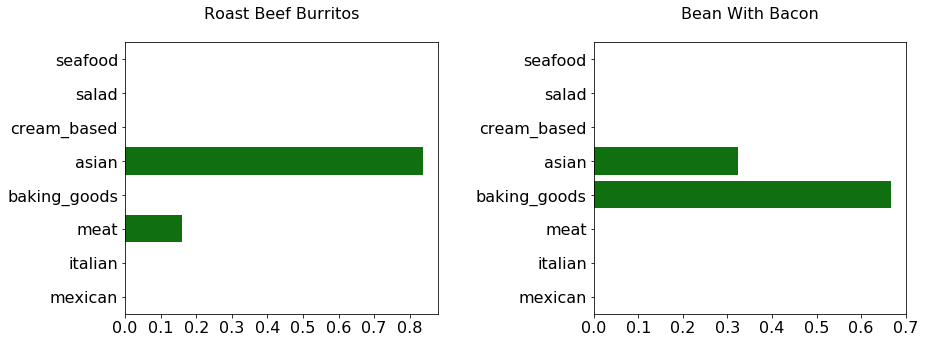

In [140]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=example.loc['Roast Beef Burritos'], y=example.columns.tolist(), color='green')
plt.title('Roast Beef Burritos\n', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16');

plt.subplot(1, 2, 2)
sns.barplot(x=example.loc['Bean With Bacon'], y=example.columns.tolist(), color='green')
plt.title('Bean With Bacon\n', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')
plt.subplots_adjust(wspace=0.5);